In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

              Lab | Cleaning numerical data
Instructions
Import the necessary libraries.

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

First look at its main features (head, shape, info).

Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

Change effective to date column to datetime format.

Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

Plot a correlation matrix, comment what you see.

Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

Comment what you can see in the plots.

Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

Did you find outliers? Comment what you will do with them.

Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
customer_df.isnull().sum()/len(customer_df)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [4]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [7]:
# Renaming the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

customer_df.columns = customer_df.columns.str.lower()
customer_df.columns = customer_df.columns.str.replace(" ", "_")

In [8]:
# Changing effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [9]:
# Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. 
# Store continuous data into a continuous_df variable and do the same for discrete_df




In [10]:
# will get the cont or disc variables from the numerical columns
customer_df_num = customer_df.select_dtypes(exclude='object')

In [11]:
customer_df_num

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,2011-02-10,71941,73,18,89,0,2,198.234764
9130,3096.511217,2011-02-12,21604,79,14,28,0,1,379.200000
9131,8163.890428,2011-02-06,0,85,9,37,3,2,790.784983
9132,7524.442436,2011-02-03,21941,96,34,3,0,3,691.200000


In [12]:
# checking if I can use nunique function to determine if the column has dicrete or contunious variables
customer_df["income"].nunique()

5694

In [13]:
def differ_cont_disc(df):
    
    df_continuous = pd.DataFrame()
    df_discrete = pd.DataFrame()
    
    for name in df.columns:
        if df[name].nunique() >10:
            df_continuous[name] = df[name]
        else:
            df_discrete[name] = df[name]
    return df_continuous, df_discrete


customer_df_continuous, customer_df_discrete = differ_cont_disc(customer_df_num)


In [14]:
customer_df_continuous

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,7645.861827,2011-01-20,0,106,18,65,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,138.130879
...,...,...,...,...,...,...,...
9129,23405.987980,2011-02-10,71941,73,18,89,198.234764
9130,3096.511217,2011-02-12,21604,79,14,28,379.200000
9131,8163.890428,2011-02-06,0,85,9,37,790.784983
9132,7524.442436,2011-02-03,21941,96,34,3,691.200000


In [15]:
customer_df_discrete

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


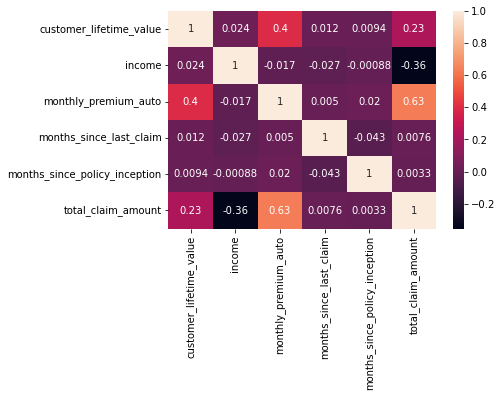

In [16]:
# Plotting a correlation matrix
correlations_matrix = customer_df_continuous.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()


In [17]:
# Creating a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)


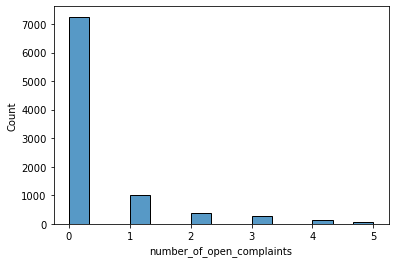

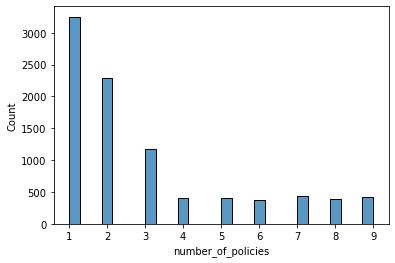

In [18]:
def plot_disc_hist(df):
    for name in df.columns:
        sns.histplot(data=df[name])
        plt.show()
    return

plot_disc_hist(customer_df_discrete)

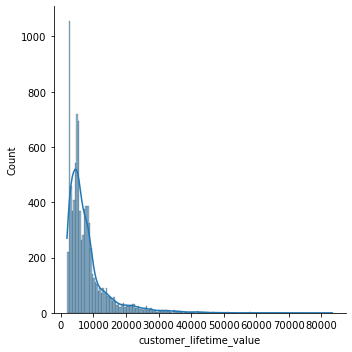

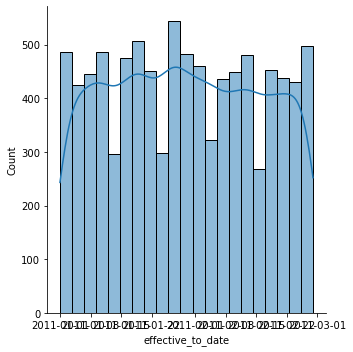

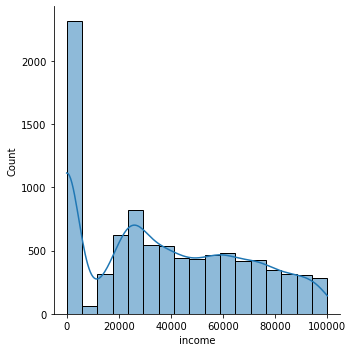

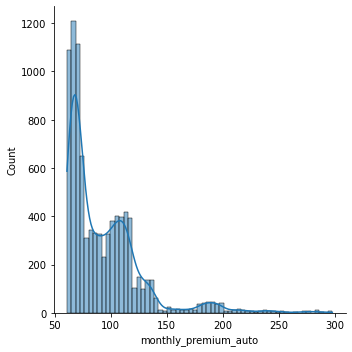

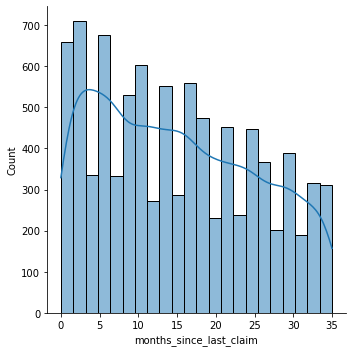

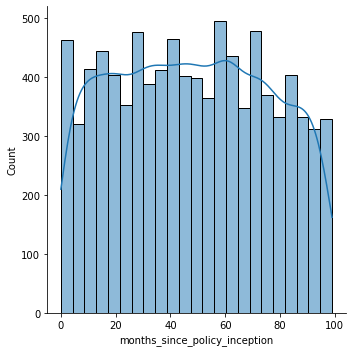

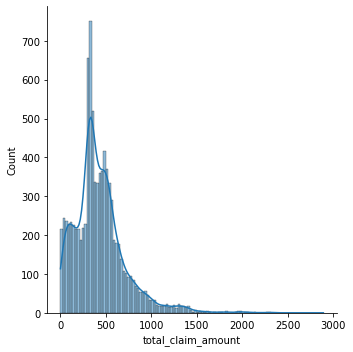

In [19]:
def plot_cont_displot(df):
    for name in df.columns:
        sns.displot(data=df, x=name, kde=True)
    return

plot_cont_displot(customer_df_continuous)

            NOTE TO MYSELF: NOT COMPLETED YET ( Lab | Cleaning numerical data)
Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

Did you find outliers? Comment what you will do with them.

Check all columns for NaN values. Decide what (if anything) you will need to do with them.

             Lab | Cleaning categorical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Instructions
Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

Find all of the categorical data. Save it in a categorical_df variable.

Check for NaN values.

Check all unique values of columns.

Check dtypes. Do they all make sense as categorical data?

Does any column contain alpha and numeric data? Decide how to clean it.

Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [20]:
# Finding all of the categorical data. Save it in a categorical_df variable.
categorical_df = customer_df.select_dtypes(object)
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [21]:
# Checking for NaN values.

categorical_df.isnull().sum()

# there is none

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [22]:
# Checking all unique values of columns.
# customer column is like index, so dropping it first
categorical_df = categorical_df.drop('customer', axis=1)


In [23]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [24]:
def count_uniq_cat(df):
    
    for name in df.columns:
        display(name)
        display(df[name].nunique())
        display(df[name].value_counts())


count_uniq_cat(categorical_df)

'state'

5

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

'response'

2

No     7826
Yes    1308
Name: response, dtype: int64

'coverage'

3

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

'education'

5

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

'employmentstatus'

5

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

'gender'

2

F    4658
M    4476
Name: gender, dtype: int64

'location_code'

3

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

'marital_status'

3

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

'policy_type'

3

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

'policy'

9

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

'renew_offer_type'

4

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

'sales_channel'

4

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

'vehicle_class'

6

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

'vehicle_size'

3

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [25]:
# Checking dtypes. Do they all make sense as categorical data? -yes
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

          NOTE TO MYSELF: NOT COMPLETED YET (Lab | Cleaning categorical data)
Does any column contain alpha and numeric data? Decide how to clean it.

Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.
    

         Lab | Feature extraction
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
Open the categoricals variable we created before.
categoricals = data.select_dtypes(np.object)
categoricals.head()
Plot all the categorical variables with the proper plot. What can you see?
There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
Plot time variable. Can you extract something from it?

In [26]:
# Open the categoricals variable we created before.
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


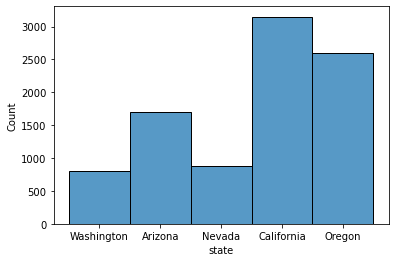

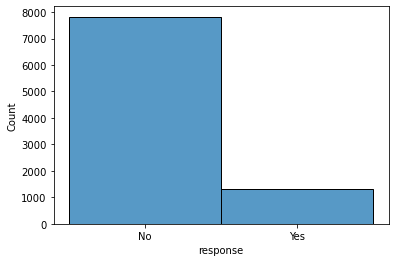

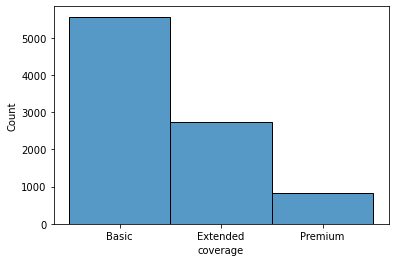

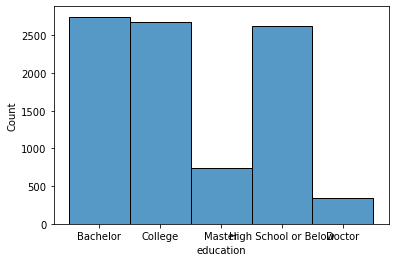

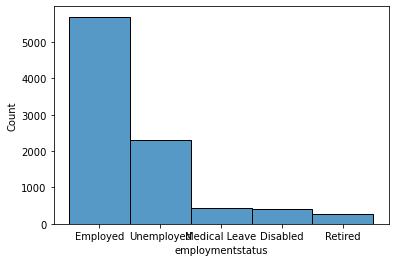

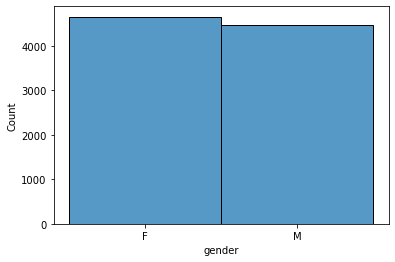

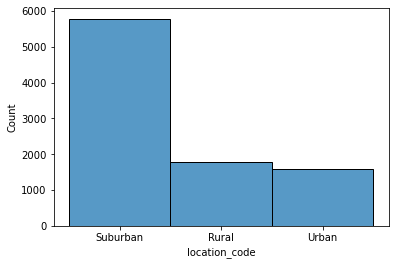

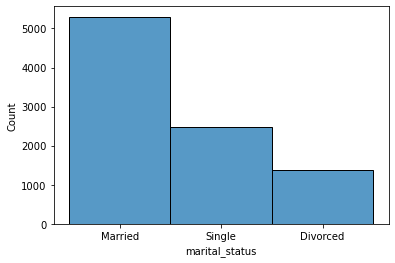

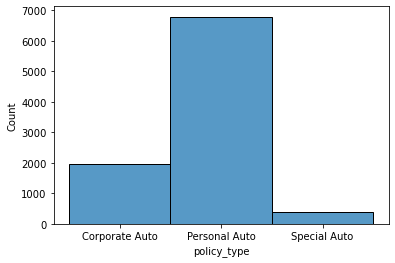

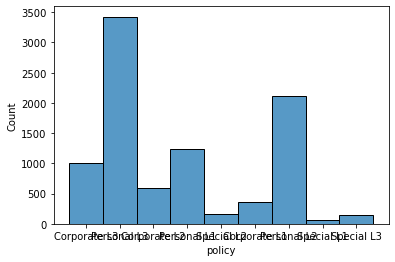

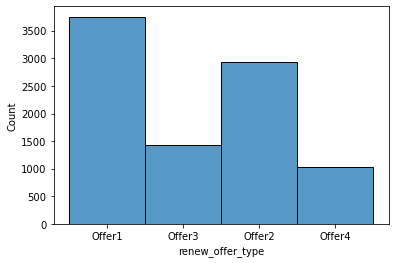

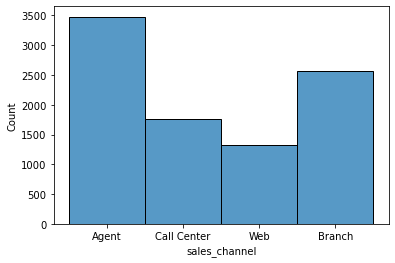

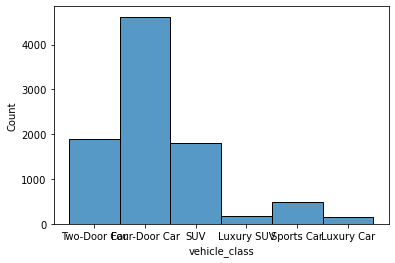

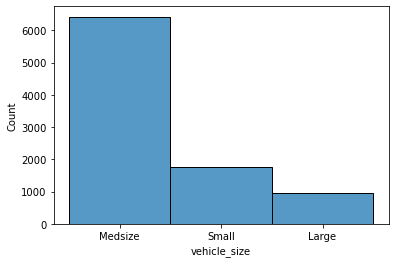

In [27]:
# Plot all the categorical variables with the proper plot. 

plot_disc_hist(categorical_df)

In [ ]:
# There might be some columns that seem to be redundant, check their values to be sure
# policy and policy type look redundant and we can drop one of them

In [ ]:
#  Plot time variable. Can you extract something from it?

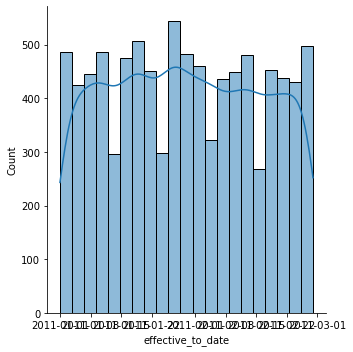

In [28]:
sns.displot(data=customer_df, x='effective_to_date', kde = True)